# Предобработка на податоците вчитани од некое податочно множество

Ќе се работи со множеството кое содржи разни податоци за патниците на бродот Титаник. Ова множество се користи често како пример за работа со податоци. Во случајот е превземен само делот од множеството кој што служи за тренирање на алгоритмите за машинско учење

Овде ќе се направи вчитување на множеството, некои основни операции (бришење на колони, промена на индекс, отстранување на редови во кои недостасуваат записи) и краток пример за работа со текстуални податоци

In [1]:
import pandas as pd
podatoci = pd.read_csv('titanic_train.csv')
podatoci.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [2]:
podatoci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [3]:
podatoci.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


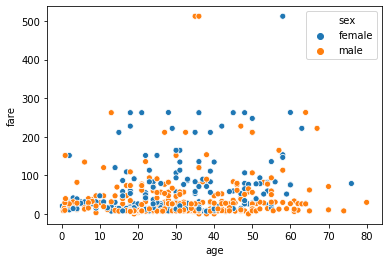

In [4]:
import seaborn as sns
sns.scatterplot(data = podatoci, x = 'age', y='fare', hue='sex')

In [5]:
SmalenoMnozhestvo = podatoci.drop(labels = ['sibsp', 'parch', 'fare', 'body', 
                                            'ticket', 'home.dest', 'cabin','name'],
                                  axis=1)
SmalenoMnozhestvo.head()

,passenger_id,pclass,sex,age,embarked,boat,survived
0,1216,3,female,NaN,Q,13,1
1,699,3,male,38.0,S,NaN,0
2,1267,3,female,30.0,S,NaN,0
3,449,2,female,54.0,S,4,1
4,576,2,male,40.0,S,NaN,0


In [6]:
print(SmalenoMnozhestvo['passenger_id'].is_unique)
SmalenoMnozhestvo = SmalenoMnozhestvo.set_index('passenger_id')
SmalenoMnozhestvo.head()

True


,pclass,sex,age,embarked,boat,survived
passenger_id,,,,,,
1216,3,female,NaN,Q,13,1
699,3,male,38.0,S,NaN,0
1267,3,female,30.0,S,NaN,0
449,2,female,54.0,S,4,1
576,2,male,40.0,S,NaN,0


In [7]:
Maska = SmalenoMnozhestvo.boat.notnull()
NeNuli = SmalenoMnozhestvo[Maska]
print(NeNuli)

              pclass     sex   age embarked boat  survived
passenger_id                                              
1216               3  female   NaN        Q   13         1
449                2  female  54.0        S    4         1
560                2  female  30.0        S   10         1
1079               3  female  22.0        S    C         1
43                 1  female  60.0        C    8         1
...              ...     ...   ...      ...  ...       ...
1256               3    male   7.0        C    C         1
208                1  female  37.0        Q   14         1
709                3  female  16.0        Q   16         1
165                1    male  38.0        S    D         1
467                2  female  24.0        S   12         1

[308 rows x 6 columns]


In [8]:
SiteIzbrishani = SmalenoMnozhestvo.dropna()
SiteIzbrishani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 449 to 467
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    263 non-null    int64  
 1   sex       263 non-null    object 
 2   age       263 non-null    float64
 3   embarked  263 non-null    object 
 4   boat      263 non-null    object 
 5   survived  263 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.4+ KB


In [9]:
NekoiIzbrishani = SmalenoMnozhestvo.dropna(subset = ['age'])
NekoiIzbrishani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 699 to 425
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    676 non-null    int64  
 1   sex       676 non-null    object 
 2   age       676 non-null    float64
 3   embarked  675 non-null    object 
 4   boat      264 non-null    object 
 5   survived  676 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 37.0+ KB


In [10]:
SmalenoMnozhestvo.isna().sum()

pclass        0
sex           0
age         174
embarked      1
boat        542
survived      0
dtype: int64

In [11]:
KolonaSoNula = SmalenoMnozhestvo['boat'].fillna(0)
KolonaSoNula

passenger_id
1216    13
699      0
1267     0
449      4
576      0
        ..
158      0
174      0
467     12
1112     0
425      0
Name: boat, Length: 850, dtype: object

In [12]:
Gospogjici = podatoci[podatoci['name'].str.contains('Miss')]
Gospogjici.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0
13,446,2,"Hocking, Miss. Ellen ""Nellie""",female,20.0,2,1,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
